<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Network_Time%20Series_and_Sequence/RNN_For_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import SGD,Adam
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

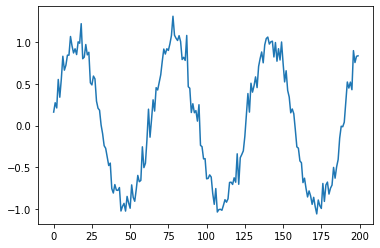

In [64]:
series1 = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series1)
plt.show()

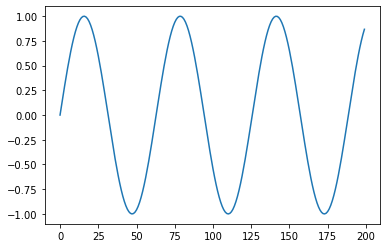

In [65]:
series2 = np.sin(0.1*np.arange(200)) 
plt.plot(series2)
plt.show()

In [66]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series1) - T):
  x = series1[t:t+T]
  X.append(x)
  y = series1[t+T]
  Y.append(y)


X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [67]:
i = Input(shape = (T,1))
x = SimpleRNN(5, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1),
)
r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 112ms/step - loss: 0.5236 - val_loss: 0.4037
Epoch 2/80
3/3 [==============================] - 0s 18ms/step - loss: 0.2483 - val_loss: 0.1688
Epoch 3/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0826 - val_loss: 0.0589
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0753 - val_loss: 0.0785
Epoch 5/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0583 - val_loss: 0.0483
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0403 - val_loss: 0.0443
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0430 - val_loss: 0.0467
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0467 - val_loss: 0.0394
Epoch 9/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0395 - val_loss: 0.0311
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0384 - val_loss: 0.0324
Epoch 11/80
3/3 [======================

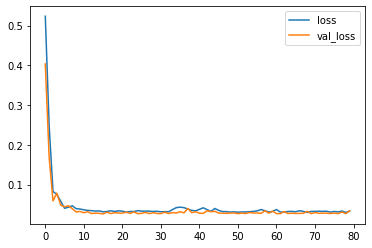

In [68]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [69]:
validation_target = Y[-N//2:]
validation_predictions = []


i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1

  validation_predictions.append(p)



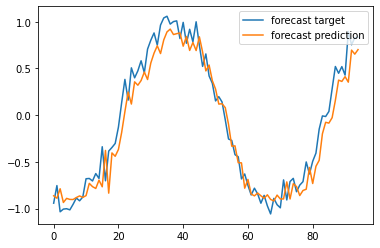

In [70]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [71]:
validation_target = Y[-N//2:]
validation_predictions = []


last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

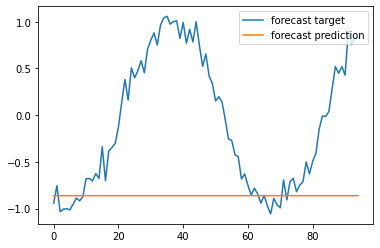

In [72]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()